<a href="https://colab.research.google.com/github/I-ULISES-I/Colabfiles/blob/main/PracticaRegresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Hernández Rodríguez Ulises
*   Matrícula: 256056

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [ ]:
# Tu código aquí
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm

#
df = pd.read_csv('drive/MyDrive/ClassFiles/advertising.csv')

#
print(df.head())

#
print("\n", df.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

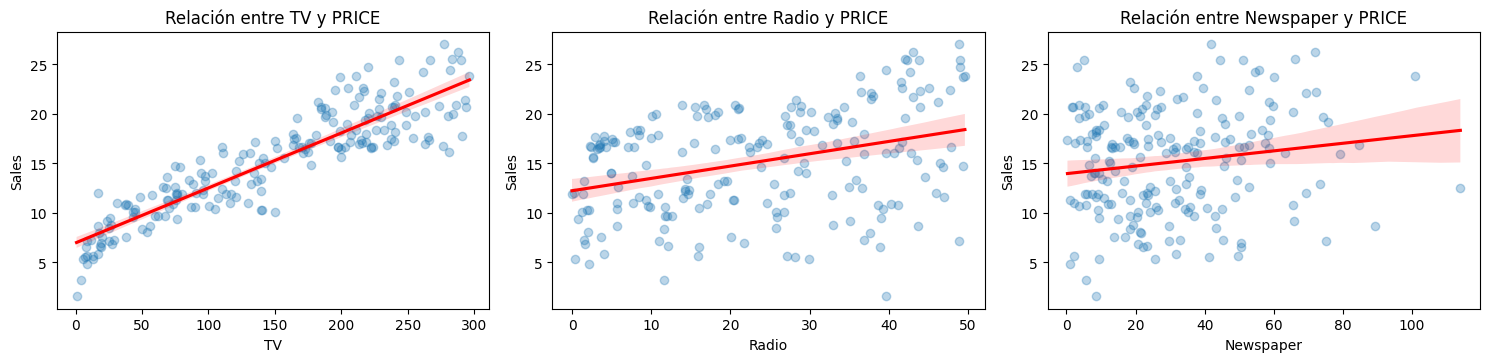

In [ ]:
# Gráficos de dispersión
#
X = df.drop(columns='Sales')  # Características
y = df['Sales']  # Variable dependiente (precio)
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x=X[col], y=y, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'}) # Se agrega regplot
    plt.title(f"Relación entre {col} y PRICE")

plt.tight_layout()
plt.show()

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? La variable que tiene una correlación fuertemente alta y positiva con “Sales” es “TV”. ¿Hay correlación alta entre predictores? Moderada positiva; de 0.35 entre “Radio” y “Newspaper”.

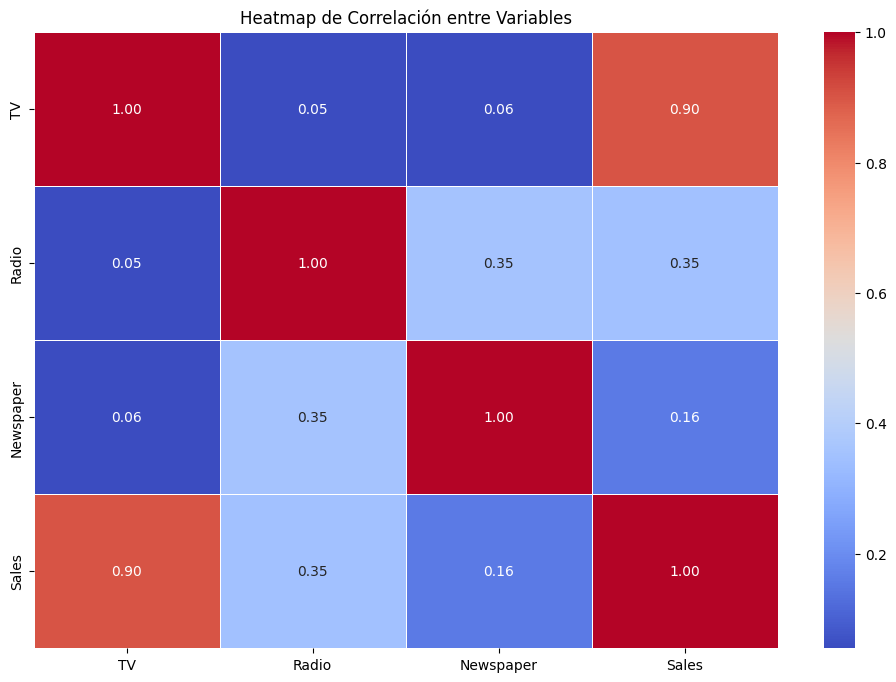

In [ ]:
# Correlación y heatmap
#
# Heatmap de correlación entre todas las variables
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables")
plt.show()

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10? Si, la variable “const” tiene un VIF de 6.848900.
- ¿Qué implicaciones tiene esto para el modelo? No tiene mucha relevancia, ya que solo es un auxiliar para calcular la multicolinealidad entre las variables independientes.


### Análisis de Multicolinealidad ###
    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


<ipython-input-147-1d81115807c0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')


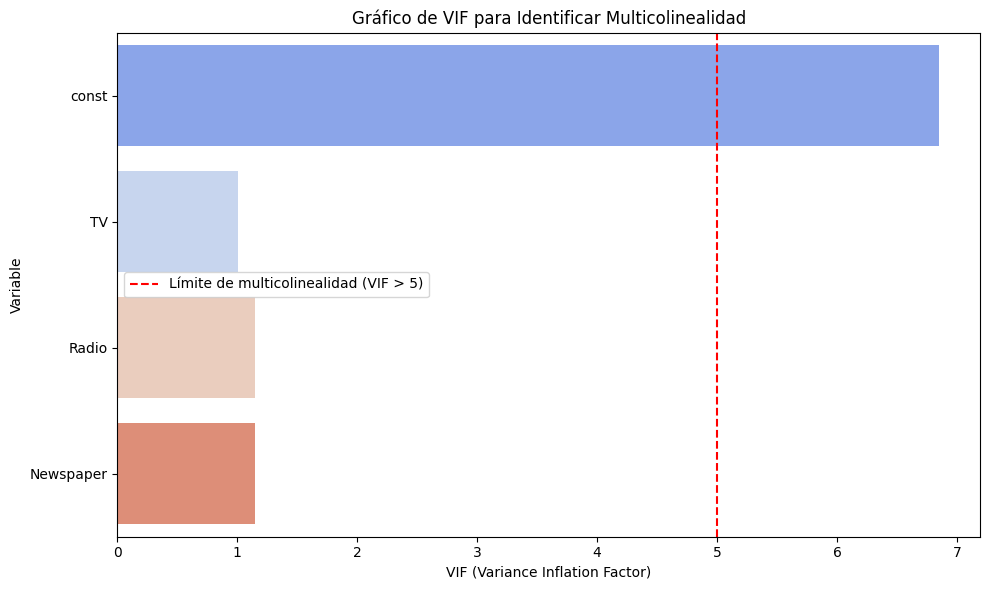

In [ ]:
#Multicolinealidad
#
# Multicolinealidad: Cálculo de VIF (Variance Inflation Factor)
# El VIF evalúa la colinealidad de cada variable con respecto a las demás. VIF > 5 o 10 indica posible multicolinealidad.

# Agregar constante para calcular el VIF
X = add_constant(df.drop(columns=['Sales']))  # Matriz de características sin la variable dependiente
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n### Análisis de Multicolinealidad ###")
print(vif_data)

# Visualización de VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')
plt.axvline(x=5, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('Gráfico de VIF para Identificar Multicolinealidad')
plt.legend()
plt.tight_layout()
plt.show()

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas? Para cada uno de los casos, suponiendo que el resto de las variables independientes se mantiene constante en 0, el valor de las ventas aumentará en:
  *   0.0544 cuando “TV” aumente en 1.
  *   0.1070 cuando “Radio” aumente en 1.
  *   0.0003 cuando “Newspaper” aumente en 1.


In [ ]:
#ntrenamiento del Modelo (Todas las Variables Independientes)
#
model = LinearRegression()
model.fit(X,y)

coefficients = model.coef_
intercept = model.intercept_

print(f"\nCoeficientes estimados: {coefficients}")
print(f"Término independiente estimado: {intercept}")
#######################################################
print('\n')
equation = f"Sales = {intercept} "
for i, coef in enumerate(coefficients):
  equation += f"+ ({coef} * {X.columns[i]}) "

equation #se obtiene el modelo con los coeficientes


Coeficientes estimados: [0.         0.05444578 0.10700123 0.00033566]
Término independiente estimado: 4.625124078808659




'Sales = 4.625124078808659 + (0.0 * const) + (0.0544457803375709 * TV) + (0.1070012282387029 * Radio) + (0.00033565792233059 * Newspaper) '

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente? Si, sin embargo, visualmente parecen tener un sesgo a la izquierda.

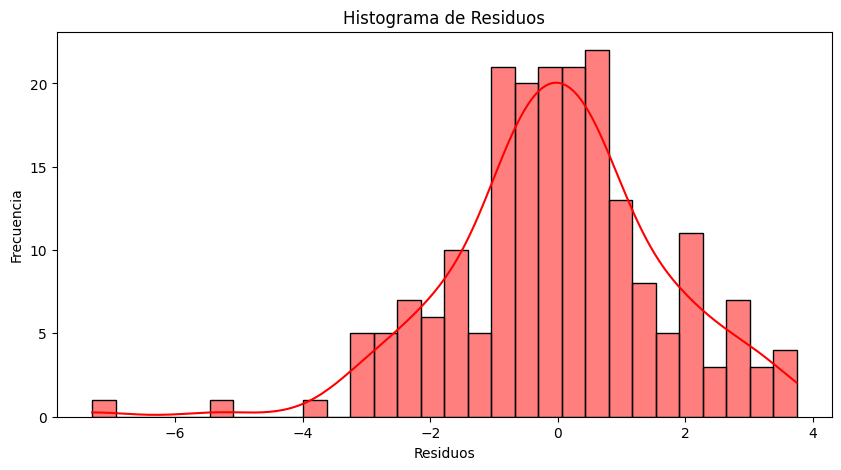

In [ ]:
#Normalidad de los residuos
#
y_predicha = model.predict(X)
residuos = y - y_predicha

#Creación y diseño de los histogramas.
plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, bins=30, color='red')
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

#Impresión de los gráficos.
plt.show()

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? No. ¿Los residuos se dispersan aleatoriamente? Así es, en base a la línea auxiliar roja que se presenta en el gráfico, los residuos tienen un comportamiento aleatorio.

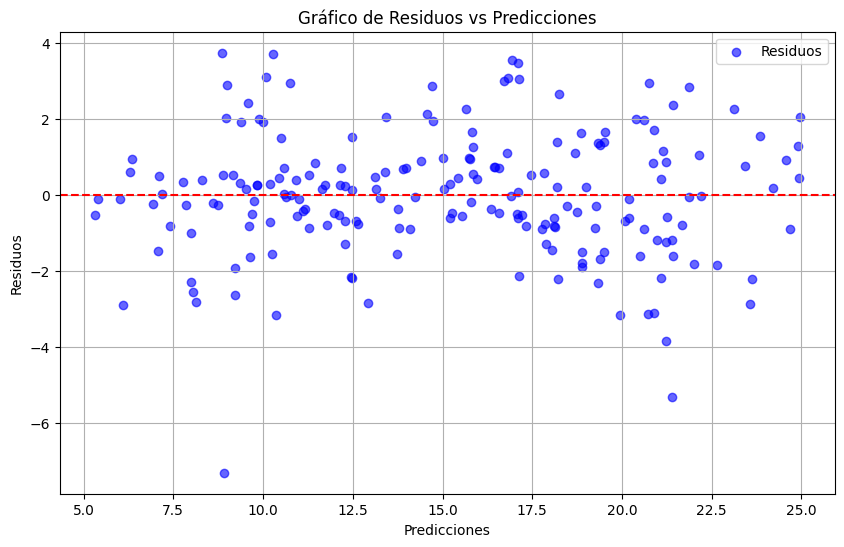

In [ ]:
# Homocedasticidad
#
plt.figure(figsize=(10, 6))
plt.scatter(y_predicha, residuos, color='blue', label='Residuos', alpha=0.6)

# Línea auxiliar en cero (para ver si los residuos están distribuidos alrededor de cero)
plt.axhline(0, color='red', linestyle='--')

# Etiquetas y título
plt.title('Gráfico de Residuos vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True)
plt.legend()
plt.show()

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

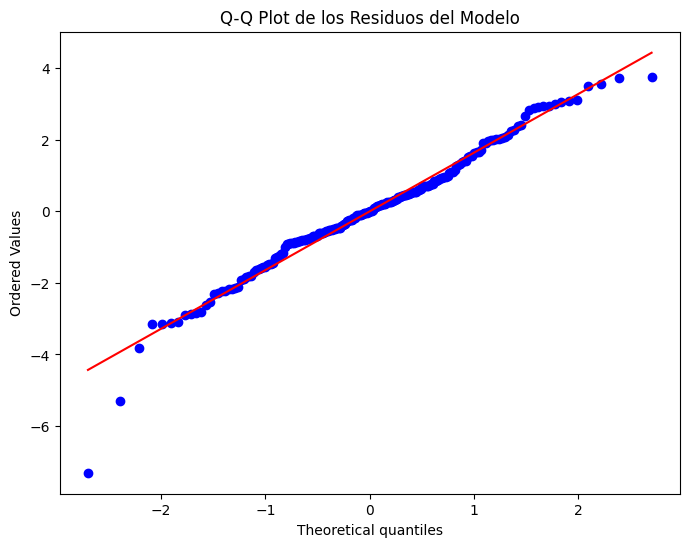

In [ ]:
#Q-Q Plot
#
# Graficar el Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuos, dist="norm", plot=plt)

# Añadir título
plt.title("Q-Q Plot de los Residuos del Modelo")

# Mostrar la gráfica
plt.show()

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo? Tanto el MSE como el RMSE son elevados, ya que nos indican (en términos de unidades) la distancia a la cual están las predicciones del modelo de los valores reales. El $R^2$ es excelente; un valor de 0.9026 indica que el modelo explica aproximadamente el 90.26% de la variabilidad de los datos.


In [ ]:
#Evaluación del Modelo
#
# Calcular las métricas del modelo
mse = mean_squared_error(y, y_predicha)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
r2 = r2_score(y, y_predicha)  # Coeficiente de determinación R^2

# Mostrar las métricas
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 2.7060
Raíz del Error Cuadrático Medio (RMSE): 1.6450
Coeficiente de Determinación (R²): 0.9026


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? Se observa que el modelo está siguiendo una relación lineal. ¿Qué información puedes obtener de esta gráfica? En base a la gráfica, podemos notar que las predicciones están siendo bastante cercanas a los valores reales, así como también el margen de error que está presentando.

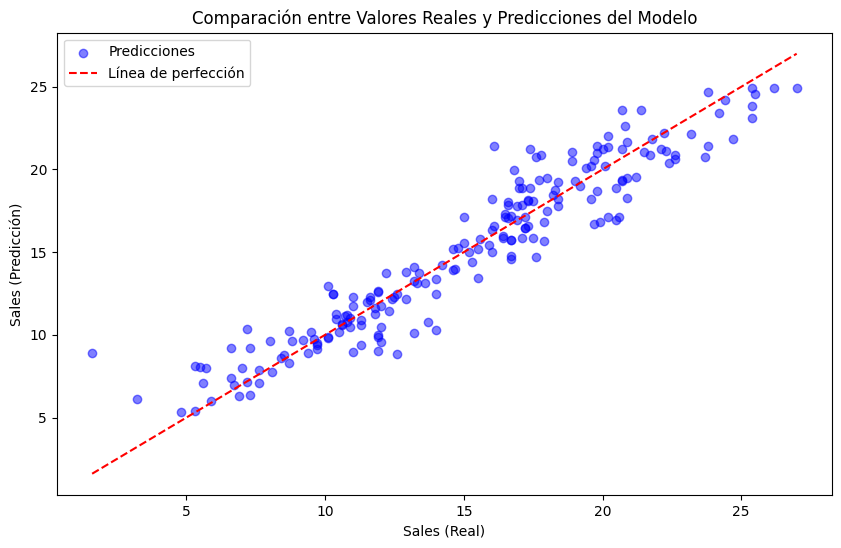

In [ ]:
#Visualización de las Predicciones
#
# Graficar los valores reales frente a las predicciones
plt.figure(figsize=(10, 6))

# Graficar los valores reales vs las predicciones
plt.scatter(y, y_predicha, alpha=0.5, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea de perfección')

# Añadir título y etiquetas
plt.title("Comparación entre Valores Reales y Predicciones del Modelo")
plt.xlabel("Sales (Real)")
plt.ylabel("Sales (Predicción)")

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05? Las variables “TV” y “Radio”.

 - ¿Cuál es la conclusión sobre esas variables? Significa que son las variables que están teniendo más impacto sobre el modelo.


In [ ]:
#P-values
#
# Agregar una constante al conjunto de datos X_scaled
X_with_constant = sm.add_constant(X)

# Ajustar el modelo de regresión lineal utilizando statsmodels
model_sm = sm.OLS(y, X_with_constant).fit()

# Imprimir el resumen del modelo
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           8.13e-99
Time:                        04:40:40   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

No se detectaron variables con multicolinealidad, por lo que se omite la realización de la parte 5.

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

### 6.1 Entrenamiento del Modelo (Solo variable TV)

1. Entrena un modelo de regresión lineal múltiple usando TV como variable independiente.
2. Imprime el intercepto y el coeficiente del modelo.


In [ ]:
#ntrenamiento del Modelo (Solo variable TV)
#
X = df.drop(columns=['Sales', 'Radio', 'Newspaper'])  # Características
y = df['Sales']  # Variable dependiente (Sales)
model = LinearRegression()
model.fit(X,y)

coefficients = model.coef_
intercept = model.intercept_

print(f"\nCoeficiente estimado: {coefficients}")
print(f"Término independiente estimado: {intercept}")
#######################################################
print('\n')
equation = f"Sales = {intercept} "
for i, coef in enumerate(coefficients):
  equation += f"+ ({coef} * {X.columns[i]}) "

equation #se obtiene el modelo con los coeficientes


Coeficiente estimado: [0.05546477]
Término independiente estimado: 6.974821488229891




'Sales = 6.974821488229891 + (0.055464770469558874 * TV) '

### 6.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

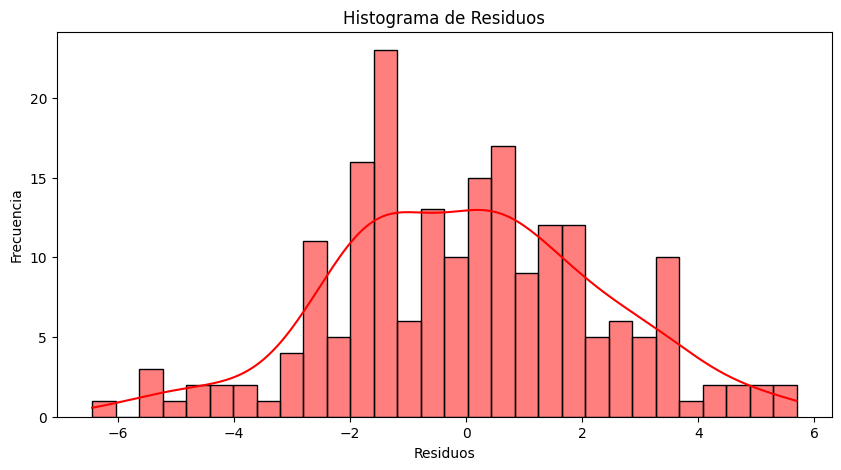

In [ ]:
#Normalidad de los residuos
#
y_predicha = model.predict(X)
residuos = y - y_predicha

#Creación y diseño de los histogramas.
plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, bins=30, color='red')
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

#Impresión de los gráficos.
plt.show()

### 6.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.

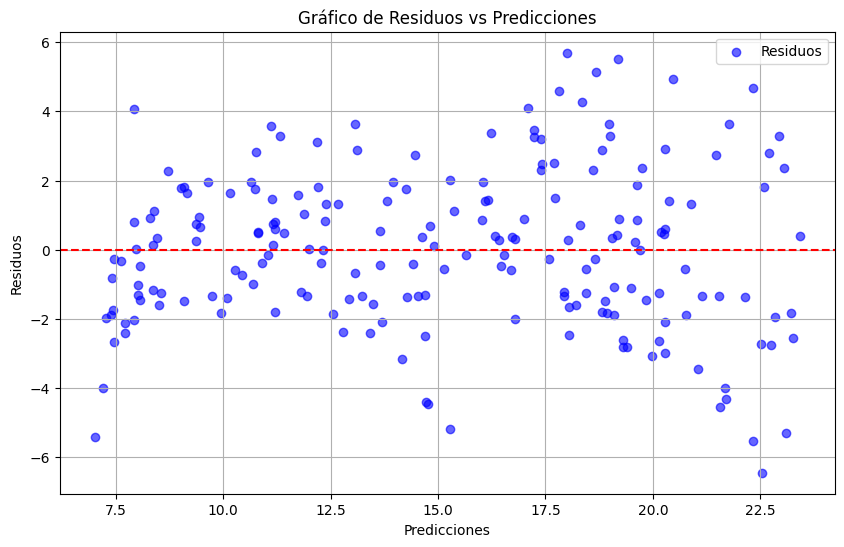

In [ ]:
# Homocedasticidad
#
plt.figure(figsize=(10, 6))
plt.scatter(y_predicha, residuos, color='blue', label='Residuos', alpha=0.6)

# Línea auxiliar en cero (para ver si los residuos están distribuidos alrededor de cero)
plt.axhline(0, color='red', linestyle='--')

# Etiquetas y título
plt.title('Gráfico de Residuos vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True)
plt.legend()
plt.show()

### 6.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

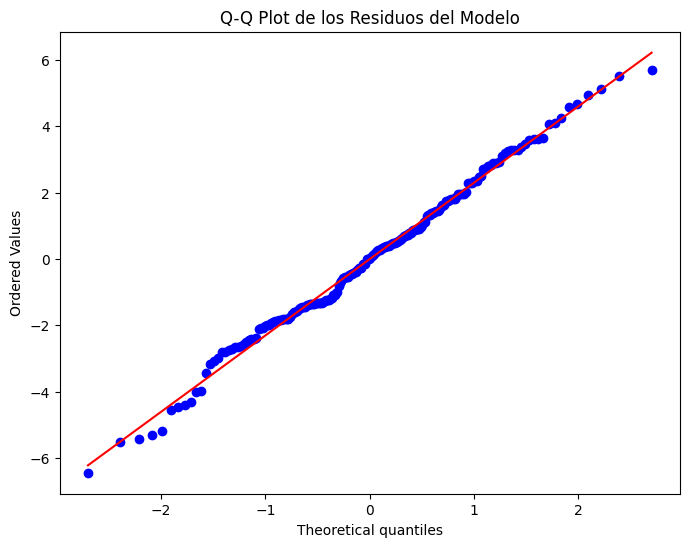

In [ ]:
#Q-Q Plot
#
# Graficar el Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuos, dist="norm", plot=plt)

# Añadir título
plt.title("Q-Q Plot de los Residuos del Modelo")

# Mostrar la gráfica
plt.show()

### 6.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

In [ ]:
#Evaluación del Modelo
#
# Calcular las métricas del modelo
mse = mean_squared_error(y, y_predicha)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
r2 = r2_score(y, y_predicha)  # Coeficiente de determinación R^2

# Mostrar las métricas
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 5.2177
Raíz del Error Cuadrático Medio (RMSE): 2.2842
Coeficiente de Determinación (R²): 0.8122


### 6.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.

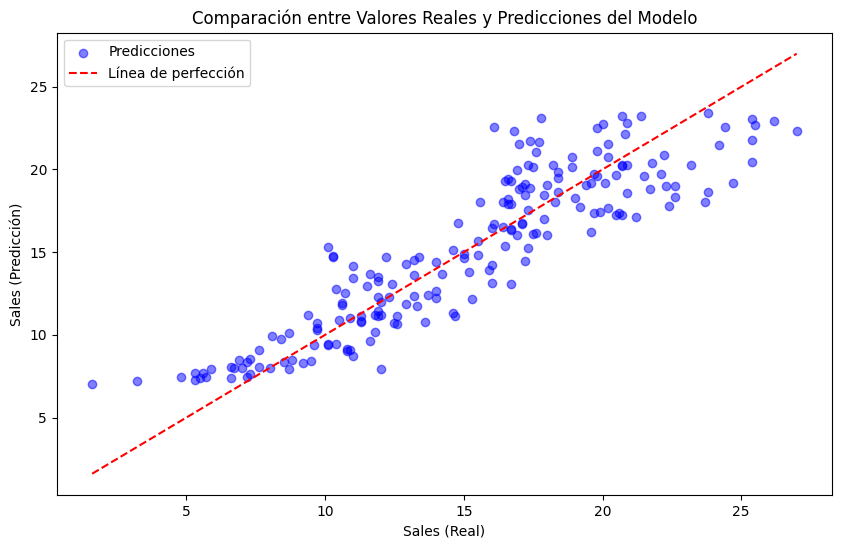

In [ ]:
#Visualización de las Predicciones
#
# Graficar los valores reales frente a las predicciones
plt.figure(figsize=(10, 6))

# Graficar los valores reales vs las predicciones
plt.scatter(y, y_predicha, alpha=0.5, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea de perfección')

# Añadir título y etiquetas
plt.title("Comparación entre Valores Reales y Predicciones del Modelo")
plt.xlabel("Sales (Real)")
plt.ylabel("Sales (Predicción)")

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

### 6.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.


In [ ]:
#P-values
#
# Agregar una constante al conjunto de datos X_scaled
X_with_constant = sm.add_constant(X)

# Ajustar el modelo de regresión lineal utilizando statsmodels
model_sm = sm.OLS(y, X_with_constant).fit()

# Imprimir el resumen del modelo
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           7.93e-74
Time:                        04:40:41   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor? Solo se construyeron 2 modelos. El primer modelo tiene un mejor ajuste y una mejor precisión.
¿Cuál fue el atributo que mas influencia tiene en las ventas? Al realizar el modelo de la parte 6, creí que iba a tener un mejor resultado, ya que en base a la relación lineal que tienen las variables independientes con la variable dependiente, “TV” presenta una mejor relación que el resto de las variables. Sin embargo, al realizar las predicciones y graficarlas, si se observa una relación lineal, pero los valores están más distribuidos que los del modelo que considera todas las variables independientes.